Ionizing radiation is invisible and not directly detectable by human senses, so radiation detection instruments such as Geiger counters are required to detect it. Ionizing radiation is used in a wide variety of fields such as medicine, research, manufacturing, construction, and many other areas, but presents a health hazard if proper measures against undesired exposure aren't followed. Exposure to ionizing radiation causes damage to living tissue, and can result in mutation, radiation sickness, cancer, and death. 
~ Wikipedia

There are fiew pages which provide online measurements abour gamma radiation:
http://radioactiveathome.org/map/ -  project conducted by community, anyone can have his one Geiger counter and send data to server
http://www.srp.ecocentre.kiev.ua/MEDO-PS/index.php - map with Geiger counters located inside Chernobyl Exclusion Zone
http://www.tepco.co.jp/en/nu/fukushima-np/f1/index-e.html - Geiger counters located nearby Fukushima Daiichi Nuclear Power Station

In this project I use data from first link. Unfortunately archive data are stored maximum 2 months. Majjority of sensors are located in Europe, thus this project is focused on Europe.
There are two modules:
- NLPNewsChecker - which extract date and countries(European) from news, and it also checks if news is about ionizing radiation
- RadiationScrapingTool - tool which download data from http://radioactiveathome.org/map/ and its archive. Then data are being processed and analised.

# NLPNewsChecker example

In [ ]:
news1 = "http://www.independent.co.uk/life-style/gadgets-and-tech/news/radiation-europe-russian-missile-strike-radioactive-material-france-norway-iodine-131-irsn-a7591886.html"
news2 = "http://www.mirror.co.uk/science/nuclear-radiation-been-spreading-across-9861177"
news3 = "http://www.livemint.com/Politics/JCr7gRUyV7l8xtkWwhwHfN/High-air-pollution-levels-may-hit-Indias-solar-power-genera.html"

In [ ]:
from nlp_news_checker import NLPNewsChecker
nlp_news1 = NLPNewsChecker(news1)
nlp_news2 = NLPNewsChecker(news2)
nlp_news3 = NLPNewsChecker(news3)

In [ ]:
from radiation_scraping_tool import RadiationScrapingTool

In [2]:
tool = RadiationScrapingTool()

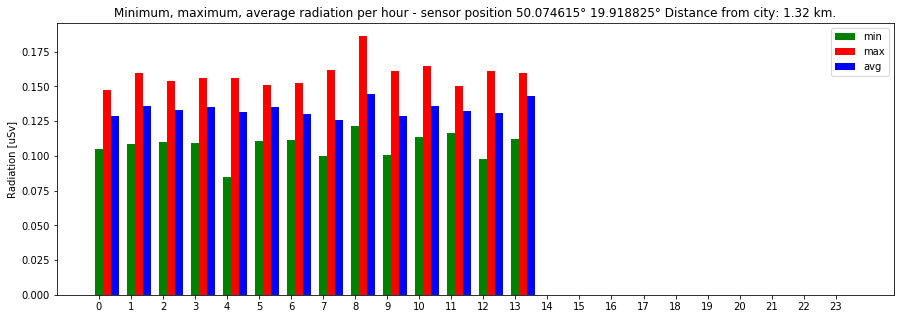

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h


In [3]:
data = tool.check_radiation_in_city_day("Krak", "2017-06-04", 10)

In [123]:
prepared_data = RadiationScrapingTool.get_min_max_avg_per_hour(data[len(data)-1][1])

In [124]:
prepared_data

array([[ 0.12431756,  0.17163527,  0.14288827],
       [ 0.14214637,  0.14315158,  0.14264897],
       [ 0.11849699,  0.1769697 ,  0.14154326],
       [ 0.13894315,  0.15799599,  0.14857446],
       [ 0.13056016,  0.16352   ,  0.14725305],
       [ 0.11691692,  0.16279257,  0.14301261],
       [ 0.13305959,  0.14764456,  0.13938344],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.13149862,  0.16055986,  0.14747084],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   

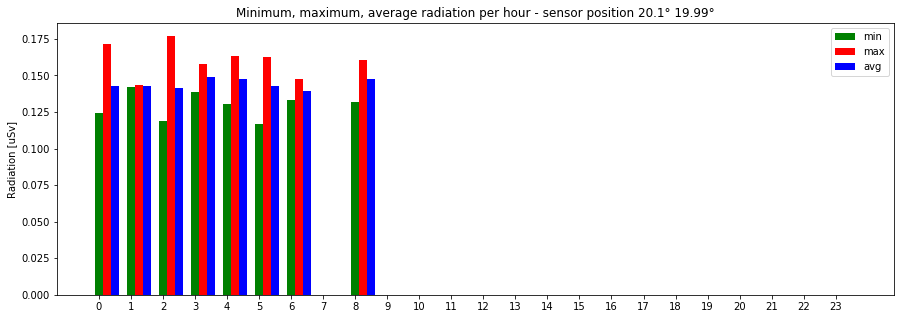

In [125]:
import matplotlib.pyplot as plt
(c1, c2) = coords = (20.1,19.99)
fig, ax = plt.subplots(figsize=(15,5))

width = 1
min_v = ax.bar([x * 4 for x in range(24)], prepared_data[:,0], width, color='g')
max_v = ax.bar([x * 4 + 1 for x in range(24)], prepared_data[:,1], width, color='r')
avg_v = ax.bar([x * 4 + 2 for x in range(24)], prepared_data[:,2], width, color='b')

ax.set_ylabel('Radiation [uSv]')
ax.set_title('Minimum, maximum, average radiation per hour - sensor position ' + str(c1) + '° ' + str(c2) + '°')
ax.set_xticks([x * 4 for x in range(24)])
ax.set_xticklabels([x for x in range(24)])

ax.legend((min_v[0], max_v[0], avg_v[0]), ('min', 'max', 'avg'))

plt.show()